### Treść zadania

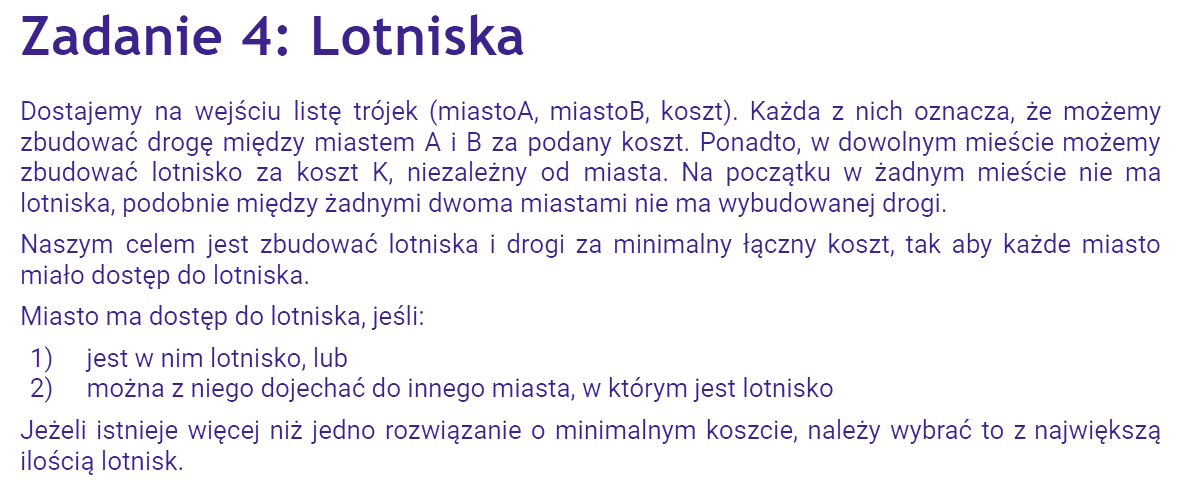

### Omówienie algorytmu

###### Najpierw musimy zauważyć następujące rzeczy:
- Graf miast i możliwych do wybudowania między nimi dróg nie musi być spójny,
- Chcemy zminimalizować liczbę dróg oraz zmaksymalizować liczbę lotnisk, oczywiście minimalizując przy tym sumaryczny koszt,
- Jeżeli krawędź (droga) między dwoma miastami jest droższa od $ K $ lub jej koszt jest równy $ K $ (kosztowi wybudowania lotniska) (warunek na równość wynika stąd, że jeżeli istnieje więcej niż 1 najtańsze rozwiązanie, bierzemy to o większej liczbie lotnisk), "usuwamy" tę krawędź z grafu (w rzeczywistości zaimplementujemy to nieco inaczej - patrz niżej),
- Jeżeli krawędź ma koszt niższy niż koszt wybudowania lotniska, może się ona znaleźć w naszym rozwiązaniu, ale nie musi, bo np. w pozostałym grafie mogą być cykle, a bez sensu jest tworzyć cykl, wystarczy nam drzewo spinające, które zawsze łączy wszystkie wierzchołki, minimalnym sumarycznym kosztem.


###### Algorytm:
- Tworzymy graf w którym znajdą się jedynie krawędzie o koszcie niższym niż $ K $,
- Znajdujemy spójne składowe grafu (w każdej spójnej składowej będzie dokładnie jedno lotnisko),
- W każdej spójnej składowej wyznaczamy minimalne drzewo spinające (to nam da minimalny sumaryczny koszt dróg), a ponieważ wszystkie krawędzie mają wagi mniejsze od $ K $, nigdy nie wybudujemy więcej niż 1 lotniska w spójnej składowej, ponieważ koszt wybudowania drogi będzie zawsze niższy.
- Do sumarycznego kosztu wliczamy wagę minimalnego drzewa spinającego z każdej spójnej składowej i dodajemy koszt wszystkich lotnisk, czyli $ K $ razy liczba spójnych składowych (utworzonych tak, jak opisałem wyżej),

###### UWAGA
Zakładam, że miasta są oznaczone przez kolejne liczby naturalne, począwszy od 0. Jeżeli by były oznaczone inaczej, trzeba by skorzystać z przemapowania oznaczeń na kolejne indeksy wierzchołków w grafie.

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $  - taka sama jak dla algorytmu Prima (lub Kruskala, jak ktoś by wolał tamten)
###### Pamięciowa:
$ O(E + V) $  - musimy zapamiętać cały graf (no może poza krawędziami o wagach nie mniejszych niż $ K $, ale to wciąż złożonościowo jest tyle, ile napisałem)

### Implementacja

In [1]:
from queue import PriorityQueue


def create_graph(cities, K):
    # Find a number of cities
    n = 0
    for c in cities:
        n = max(n, c[0], c[1])
    n += 1
    # Create a graph of cities
    # Only edges with weights lower than K will be added
    G = [[] for _ in range(n)]
    for c in cities:
        if c[2] < K:
            G[c[0]].append((c[1], c[2]))
            G[c[1]].append((c[0], c[2]))
    return G


def coherent_components(G):
    n = len(G)
    # There will be stored all the vertices from unique coherent components
    result = []
    visited = [False] * n
    
    def dfs(u):
        visited[u] = True
        for v, _ in G[u]:
            if not visited[v]:
                dfs(v)
                
    for u in range(n):
        if not visited[u]:
            result.append(u)
            dfs(u)
            
    return result


def prims(G: 'graph represented by adjacency lists', s: 'begin vertex', parents, weights, processed):
    n = len(G)
    inf = float('inf')
    pq = PriorityQueue()
    pq.put((0, s)) 
    
    while not pq.empty():
        u_weight, u = pq.get()
        # Skip a vertex if it was processed before
        if processed[u]: continue
        # If we remove the vertex from a priority queue this must be a vertex
        # with the lowest weight in a queue so we will mark this vertex as
        # processed because all the future occurrences of this vertex
        # in a priority queue must be skipped
        processed[u] = True
        # Loop over all the u vertex's neighbours and update parents of such
        # vertices which are not processed and their current weight is greater
        # than the u_weight
        for v, e_weight in G[u]:
            if not processed[v] and e_weight < weights[v]:
                parents[v] = u
                weights[v] = e_weight
                pq.put((e_weight, v))


def calc_roads_cost(weights):
    n = len(weights)
    inf = float('inf')
    total = 0
    for u in range(n):
        # Add a road segment to the total cost
        if weights[u] < inf:
            total += weights[u]
    return total


def min_cost(cities, K):
    G = create_graph(cities, K)
    n = len(G)
    inf = float('inf')
    # Find the representatives of each coherent component
    cc = coherent_components(G)
    # We will run a Prim's algorithm to find the MST for each
    # coherent component, so arrays from below will be shared
    # for the whole graph
    weights   = [inf] * n
    parents   = [None] * n
    processed = [False] * n
    # Run Prim's for each coherent component
    for u in cc: prims(G, u, parents, weights, processed)
    # Calculate a total cost of building all the optimal roads
    # and airports
    total = len(cc) * K  # We will build only one airport in each coherent component
    # Add a cost of roads
    total += calc_roads_cost(weights)
    # Return the result
    return total

###### Kilka testów

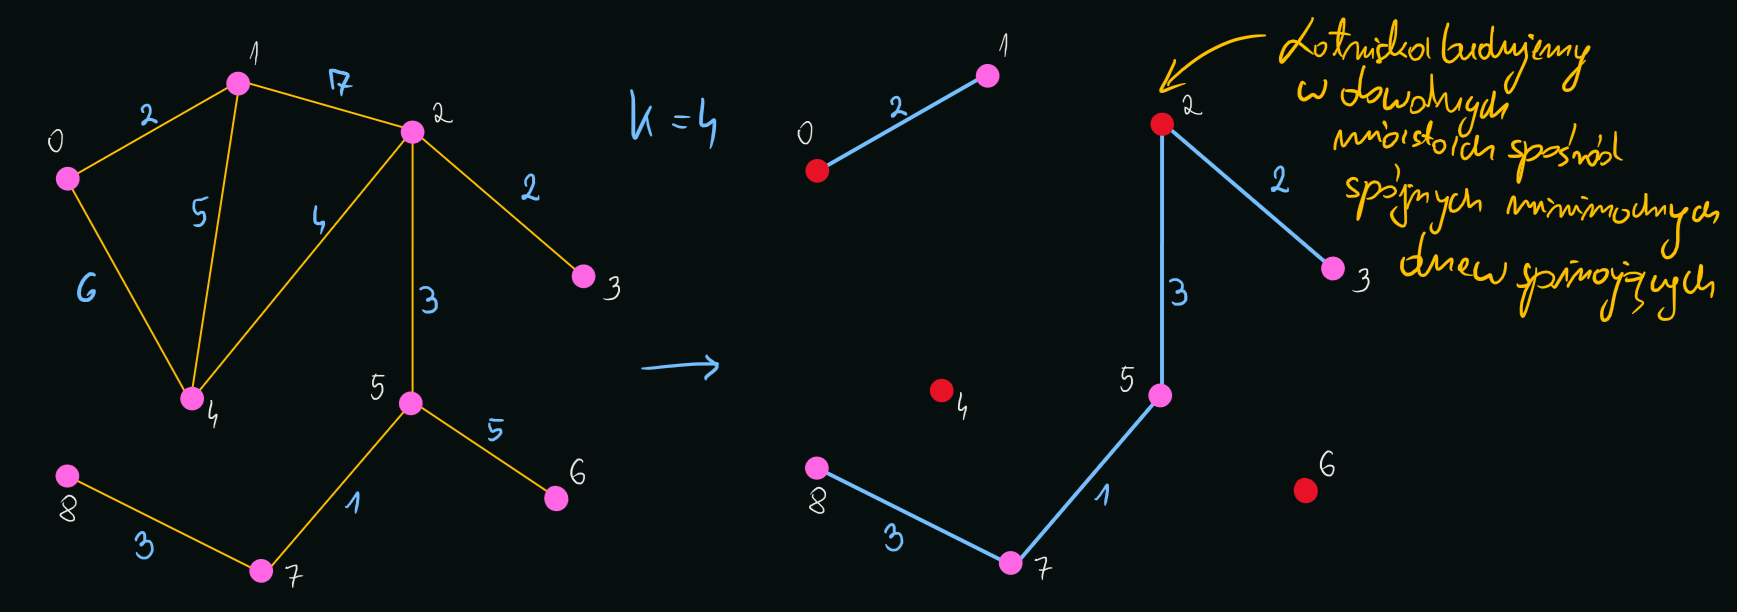

In [2]:
E = [(0, 1, 2), (1, 2, 7), (2, 3, 2), (0, 4, 6), (1, 4, 5), (4, 2, 4), (2, 5, 3), (5, 6, 5), 
     (7, 5, 1), (8, 7, 3)]

K = 4
print(min_cost(E, K))  # (2) + (2 + 3 + 1 + 3) + 4 * 4 = 2 + 9 + 16 = 27

27
